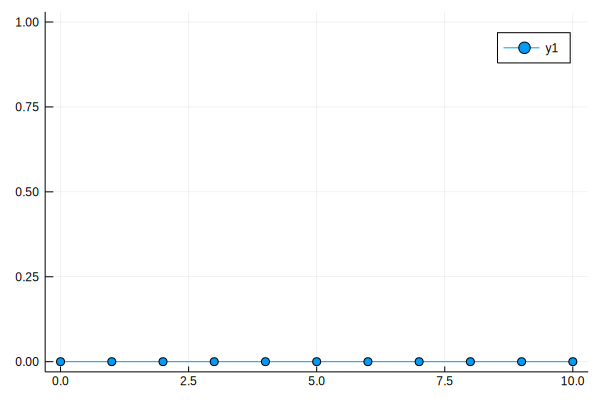

In [17]:
using Plots
a = 1.0
m = 10
vecx = [i for i in 0:m] #リスト内包表記　配列を作成している
lattice = [0.0 for i in 0:m]
plot(vecx,lattice,marker=:circle)

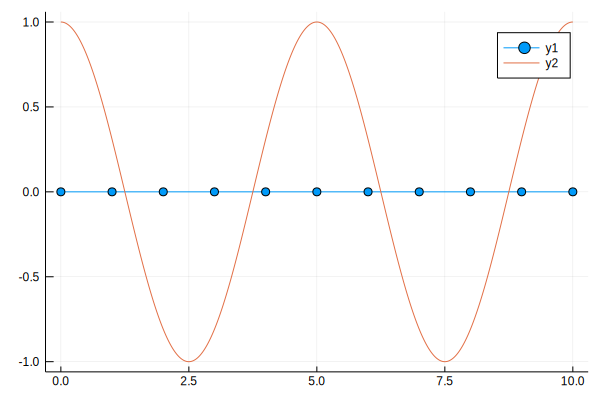

In [18]:
ns = 100
vecx1 = [i/ns for i in 0:ns*(m)]
k = 2*2π/(m)
wave1 = cos.(k*vecx1)
plot!(vecx1,wave1)

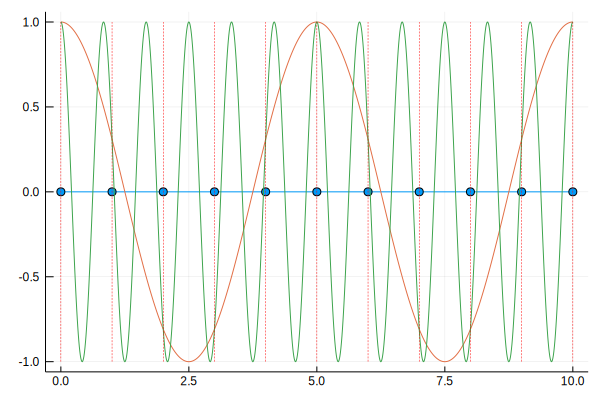

In [19]:
k += 2π
wave2 = cos.(k*vecx1)

plot!(vecx1,wave2)


c = "red"
lw = 0.5
ls = :dash
for x in vecx
    plot!([x,x],[-1,1], color=c, lw=lw, ls=ls)
end
plot!(legend=false)

In [5]:
function calc_HtbModel(Nx,μ)
    mat_Htb=zeros(Float64,Nx,Nx)
    t=1.0
    for i=1:Nx
        for dx=-1:1
            j=i+dx
            
            j+=ifelse(j<1,+Nx,0)
            j+=ifelse(j>Nx,-Nx,0)
            
            if abs(dx)==1
                mat_Htb[i,j]=-t
            elseif dx==0
                mat_Htb[i,j]=-μ
            end
        end
    end
    return mat_Htb
end

calc_HtbModel (generic function with 1 method)

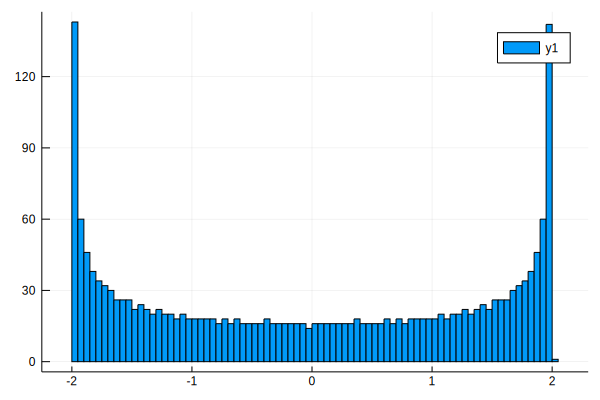

In [8]:
using LinearAlgebra
μ=0.0
Nx = 2000
mat_H = calc_HtbModel(Nx,μ)
energy,mat_v = eigen(mat_H)
using Plots
histogram(energy,bins=100)

In [9]:
function calc_HtbModel2D(Nx,Ny,μ)
    N = Nx*Ny
    mat_Htb = zeros(Float64,N,N)    
    t = 1.0
    for ix =1:Nx
        for iy=1:Ny            
            for dx in -1:1
                for dy in -1:1
                    jx = ix + dx
                    
                    jx += ifelse(jx > Nx,-Nx,0)
                    jx += ifelse(jx < 1,Nx,0)
                    
                    jy = iy + dy
                    jy += ifelse(jy > Ny,-Ny,0)
                    jy += ifelse(jy < 1,Ny,0)
                    
                    ii = (iy-1)*Nx+ix
                    jj = (jy-1)*Nx+jx
                    
                    if dx == 0 && dy == 0
                        mat_Htb[ii,jj] = -μ
                    elseif abs(dx)==1 && dy ==0
                        mat_Htb[ii,jj] = -t
                    elseif abs(dy)==1 && dx == 0
                        mat_Htb[ii,jj] = -t
                    end
                end
            end
        end
    end
                    
        
    return mat_Htb
end

calc_HtbModel2D (generic function with 1 method)

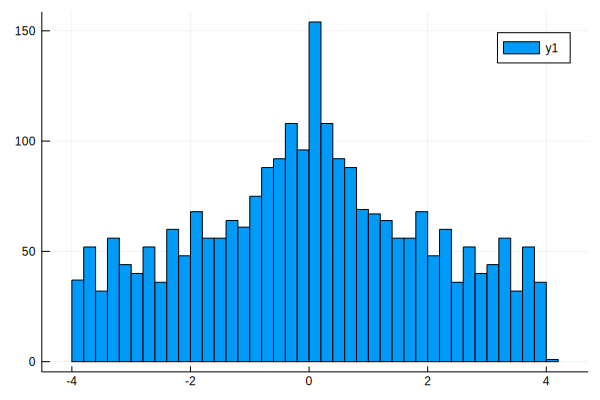

In [10]:
μ=0.0
Nx = 50
Ny = 50
mat_H = calc_HtbModel2D(Nx,Ny,μ)
energy,mat_v = eigen(mat_H)
histogram(energy,bins=50)

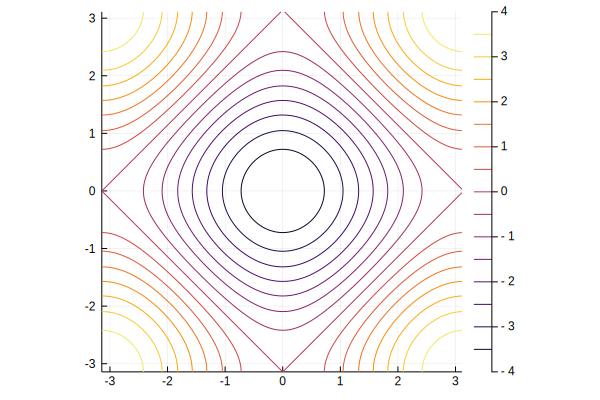

In [24]:
f(kx,ky) = -2*(cos(kx) + cos(ky))

x = -π:π/100:π  #Qiita Juliaで数値計算その3　配列の作成　数字のみ
y = -π:π/100:π
z = [f(i,j) for i in x, j in y]'　#リスト内包表記　配列の作成　文字が入る

plot(x,y,z)
plot!(aspect_ratio=:equal)

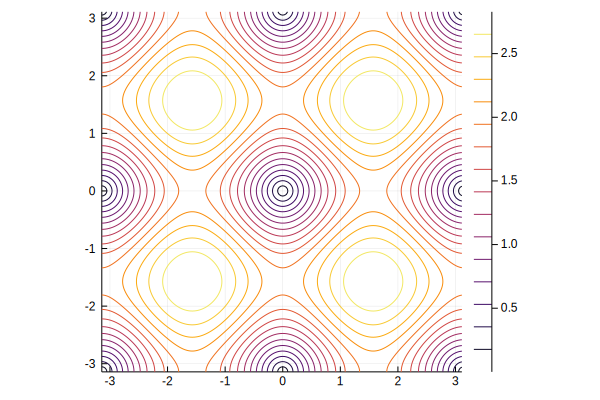

In [25]:
grad(kx,ky) = sqrt((4*(sin(kx)^2 + sin(ky)^2)))

x = -π:π/100:π
y = -π:π/100:π
z = [grad(i,j) for i in x, j in y]'

plot(x,y,z)
plot!(aspect_ratio=:equal)

In [26]:
function calc_HtbModelX(Nx,ky,μ)
    mat_Htb = zeros(Float64,Nx,Nx)    
    t = 1.0
    for ix =1:Nx            
        for dx in -1:1
            jx = ix + dx
                    
            jx += ifelse(jx > Nx,-Nx,0)
            jx += ifelse(jx < 1,Nx,0)
            if dx == 0
                mat_Htb[ix,jx] = -μ -2*t*cos(ky)
            elseif abs(dx) == 1
                mat_Htb[ix,jx] = -t
            end

        end
    end
                    
        
    return mat_Htb
end

calc_HtbModelX (generic function with 1 method)

-3.141592653589793:0.06346651825433926:3.141592653589793


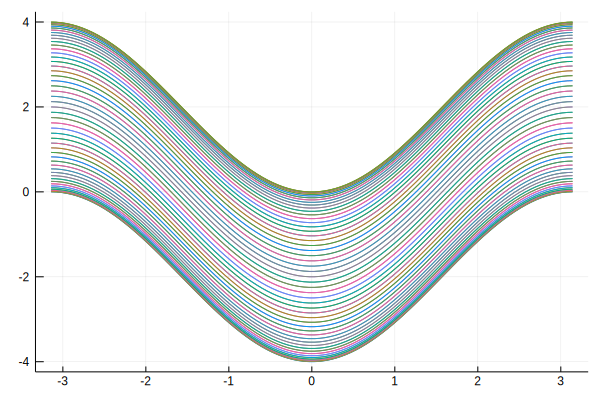

In [32]:
μ=0.0
Nx = 100
nky = 100
vky = range(-π,stop=π,length=nky)
println(vky)
ep = zeros(Float64,nky,Nx)
cnt = 0
for ky in vky    
    cnt += 1
    mat_H = calc_HtbModelX(Nx,ky,μ)
    energy,mat_v = eigen(mat_H)
    for i=1:Nx
        #println(energy[i])
        ep[cnt,i] = energy[i]
    end
end
plot(vky,ep)
plot!(legend=false)

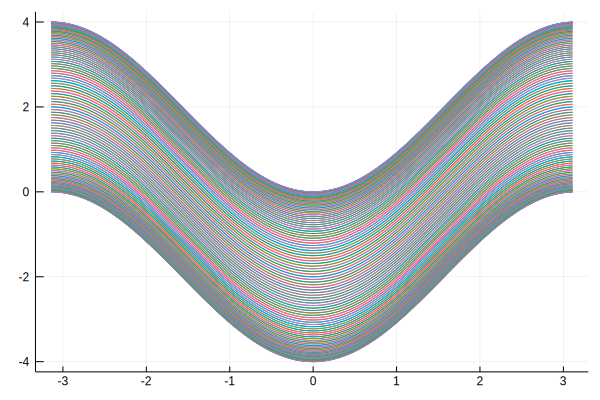

In [3]:
using Plots
f(kx,ky) = -2*(cos(kx) + cos(ky))

x = -π:π/100:π  #Qiita Juliaで数値計算その3　配列の作成　数字のみ
y = -π:π/100:π
z = [f(i,j) for i in x, j in y]'　#リスト内包表記　配列の作成　文字が入る

plot(y,z)
plot!(legend=false)